In [51]:
import os
import tensorflow as tf 
import gc
import cv2
import numpy as np
image_dir = "D:\学习笔记\ML-Tensorflow\Images"
os.chdir(image_dir)
train_dict = {}
val_dict = {}
test_dict = {}
label_list=[]

for label_dir in os.listdir(image_dir):
    class_path = os.path.join(image_dir,label_dir)
    filenames_path = [ os.path.join(label_dir,filename) for filename  in os.listdir(class_path)]
    train_dict[label_dir.split("-")[1]]=filenames_path[:int(0.8*len(filenames_path))]
    val_dict[label_dir.split("-")[1]]=filenames_path[int(0.8*len(filenames_path)):int(0.9*len(filenames_path))]
    test_dict[label_dir.split("-")[1]]=filenames_path[int(0.9*len(filenames_path)):]
    label_list.append(label_dir.split("-")[1])

from sklearn.utils import shuffle
def shuffle_batch_list(data_list,one_batch_size=1):
    y=data_list.copy()
    sample_list=[]
    while len(y)>=one_batch_size:
        samples=shuffle(y,n_samples=one_batch_size)
        sample_list.append(samples)
        for i in samples:
            y.remove(i)
    sample_list.append(y)
    return  sample_list   

train_list=[train_dict[i] for i in train_dict]
train_list=sum(train_list,[])
batchs=shuffle_batch_list(train_list,1000)



In [1]:
import tensorflow as tf
import cv2
import os
os.chdir("D:\\学习笔记\\ML-Tensorflow")
img=cv2.imread('Images\\n02085620-Chihuahua\\n02085620_199.jpg')
img=cv2.resize(img,(250,151))
image_batch = tf.placeholder(tf.float32,[151,250,3])
sess=tf.Session()
imgb=sess.run(image_batch,feed_dict={image_batch:img})

In [2]:
img.shape

(250, 151, 3)

In [1]:
import tensorflow as tf
import numpy as np
a=np.array([1,1,2,3]).reshape(2,2,1,1)
b=np.array([1,0,0,1]).reshape(1,2,2,1)
c=np.arange(15).reshape(3,5)
ta=tf.constant(a,tf.float32)
tb=tf.constant(b,tf.float32)
tc=tf.constant(c,tf.float32)

In [1]:
#准备测试数据
import tensorflow as tf
import numpy as np
w1=np.arange(3,8).reshape(5,1)
w2=np.arange(10,34).reshape(6,4)
def test_net(x1,c1):
    x2=np.dot(x1,w1)
    x2c1=np.concatenate((x2,c1))
    x2c1_rs = x2c1.reshape(1,-1)
    y1=np.dot(x2c1_rs,w2)
    return y1

input_ = np.array([np.random.normal(3,2,15).reshape(3,5) for i in range(300)])
label = np.array([np.array([np.random.randint(0,4) for j in range(3)]).reshape(3,1) for i in range(300)])

y=[]
for i,j in zip(input_,label):
    y.append(test_net(i,j)) 
y=np.array(y)


In [16]:
input_[0]

array([[ 4.13079752,  0.58256226,  5.52017626,  3.91447526,  2.70210167],
       [ 1.44595275,  4.30914322, -0.3969133 ,  4.59536337,  3.31174053],
       [ 2.62068689,  1.99621142, -2.70473325,  3.03094539,  3.37772645]])

In [17]:
w1

array([[3],
       [4],
       [5],
       [6],
       [7]])

In [8]:
np.dot(input_[0],w1)

array([[84.72508612],
       [70.34422855],
       [44.15299757]])

In [12]:
np.concatenate((np.dot(input_[0],w1),label[0])).reshape(-1,6)

array([[84.72508612, 70.34422855, 44.15299757,  0.        ,  0.        ,
         2.        ]])

In [14]:
w2

array([[10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21],
       [22, 23, 24, 25],
       [26, 27, 28, 29],
       [30, 31, 32, 33]])

In [15]:
np.dot(np.concatenate((np.dot(input_[0],w1),label[0])).reshape(-1,6),w2)

array([[2686.82401718, 2888.04632942, 3089.26864166, 3290.4909539 ]])

In [2]:
#构建测试网络
def add_layer(x,input_size,output_size,activitation_function,init_weight_var=None):
    if init_weight_var is None:
        init_weight_var=1/input_size
    weight=tf.Variable(tf.random_normal([input_size,output_size])*np.sqrt(init_weight_var)) ##2/input_size,2/(input_size+output_size)
    bias=tf.Variable(tf.zeros([1,output_size])+0.01)
    wx_plus_b=tf.matmul(x,weight)+bias
    if activitation_function is None:
                       output = wx_plus_b
    else:
                       output = activitation_function(wx_plus_b)
    return output,weight,bias,wx_plus_b

img_batch = tf.placeholder(tf.float32,[None,3,5])
lab_batch = tf.placeholder(tf.float32,[None,3,1])
out_batch = tf.placeholder(tf.float32,[None,1,4])

w1_dim1 = img_batch.get_shape()[-1].value
with tf.name_scope("dnn_lay1"):
    output1,weight1,bias1,wx_plus_b1 = add_layer(img_batch,w1_dim1,1,activitation_function=None)

with tf.name_scope("dnn_concat"):
    lab_concat = tf.concat((output1,lab_batch),axis=1)
    lab_concat_rs = tf.reshape(lab_concat,[-1,1,6])

w1_dim2 = lab_concat_rs.get_shape()[-1].value
with tf.name_scope("dnn_lay2"):
    output2,weight2,bias2,wx_plus_b2 = add_layer(lab_concat_rs,w1_dim2,4,activitation_function=None)


    
loss = tf.reduce_sum(tf.square(out_batch - output2))

global_step = tf.Variable(0)
learning_rate = tf.train.piecewise_constant(
    global_step,
    [100],
    [1e-8,1e-7])

train=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_step)
    

# 测试

In [4]:
#准备测试数据
import tensorflow as tf
import numpy as np
w1=np.arange(3,8).reshape(5,1)
w2=np.arange(10,22).reshape(3,4)
def test_net(x1,w1,w2):
    x2=np.dot(x1,w1)
    x2c1_rs = x2.reshape(1,-1)
    y1=np.dot(x2c1_rs,w2)
    return y1

input_ = np.array([np.random.normal(3,2,15).reshape(3,5) for i in range(300)])
# label = np.array([np.array([np.random.randint(0,4) for j in range(3)]).reshape(3,1) for i in range(300)])

y=[]
for i in input_:
    y.append(test_net(i)) 
y=np.array(y)

#构建测试网络
def add_layer(x,input_size,output_size,activitation_function,init_weight_var=None):
    if init_weight_var is None:
        init_weight_var=1/input_size
    weight=tf.Variable(tf.random_normal([input_size,output_size])*np.sqrt(init_weight_var)) ##2/input_size,2/(input_size+output_size)
    bias=tf.Variable(tf.zeros([1,output_size])+0.01)
    wx_plus_b=tf.matmul(x,weight)+bias
    if activitation_function is None:
                       output = wx_plus_b
    else:
                       output = activitation_function(wx_plus_b)
    return output,weight,bias,wx_plus_b

img_batch = tf.placeholder(tf.float32,[None,3,5])
lab_batch = tf.placeholder(tf.float32,[None,3,1])
out_batch = tf.placeholder(tf.float32,[None,1,4])

w1_dim1 = img_batch.get_shape()[-1].value
with tf.name_scope("dnn_lay1"):
    output1,weight1,bias1,wx_plus_b1 = add_layer(img_batch,w1_dim1,1,activitation_function=None)


output1=tf.reshape(output1,[-1,1,3])
with tf.name_scope("dnn_lay2"):
    output2,weight2,bias2,wx_plus_b2 = add_layer(output1,3,4,activitation_function=None)
 
    
loss = tf.reduce_sum(tf.square(out_batch - output2))

train=tf.train.GradientDescentOptimizer(1e-8).minimize(loss)


#训练
ds = tf.data.Dataset.from_tensor_slices((input_,y))
ds = ds.repeat().shuffle(40).batch(40)
iterator= ds.make_one_shot_iterator()
next_element=iterator.get_next()

sess=tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

for i in range(30000):    
#     x,o=sess.run(next_element)
    if i%300==0:
#         [ls,wg1,wg2] = sess.run([loss,weight1,weight2],feed_dict={img_batch:x,out_batch:o})

        [ls,wg1,wg2] = sess.run([loss,weight1,weight2],feed_dict={img_batch:input_,out_batch:y})
        print('################################################loss:%s\nw1:\n%s\nw2:\n%s\n'%(ls,wg1,wg2))
    
#     sess.run(train,feed_dict={img_batch:x,out_batch:o})
    sess.run(train,feed_dict={img_batch:input_,out_batch:y})
    

In [8]:
sess.run(output2,feed_dict={img_batch:x,lab_batch:l,out_batch:o})

array([[[0.       , 0.       , 2.8468325, 0.       ]],

       [[0.       , 0.       , 1.5577683, 0.       ]]], dtype=float32)

In [13]:
sess.run(out_batch,feed_dict={img_batch:x,lab_batch:l,out_batch:o})

array([[[3452.9753, 3691.3167, 3929.658 , 4167.999 ]],

       [[3632.585 , 3864.6196, 4096.6543, 4328.689 ]]], dtype=float32)

In [ ]:
is_training=tf.placeholder(tf.bool)
r1=tf.nn.conv2d(tb,ta,strides=[1,1,1,1],padding='SAME')

r2=tf.contrib.layers.fully_connected(
        tc,
        4,
         normalizer_fn=tf.layers.batch_normalization,
         normalizer_params={'training':is_training},  
        weights_initializer= tf.truncated_normal_initializer(stddev=0.1),
        activation_fn=None
                                 )

In [93]:
tf.global_variables()

[<tf.Variable 'Variable:0' shape=(2, 3, 5) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(2, 5, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(2, 3, 5) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(2, 5, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(2, 3, 5) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(5, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(2, 3, 5) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(5, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(2, 3, 5) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(5, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(2, 3, 5) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(5, 1) dtype=float32_ref>,
 <tf.Variable 'dnn_lay1/Variable:0' shape=(5, 1) dtype=float32_ref>,
 <tf.Variable 'dnn_lay1/Variable_1:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'dnn_lay1_1/Variable:0' shape=(5, 1) dtype=float32_ref>,
 <tf.Variable 'dnn_la

In [4]:
sess=tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

In [12]:
sess.run(tf.nn.relu(tf.get_default_graph().get_tensor_by_name('fully_connected/weights:0')))

array([[0.00164845, 0.        , 0.        , 0.06651318],
       [0.        , 0.        , 0.04335287, 0.02842352],
       [0.        , 0.        , 0.03467898, 0.05914516],
       [0.        , 0.        , 0.05042427, 0.13788454],
       [0.00670899, 0.01732051, 0.11082268, 0.00604221]], dtype=float32)

In [6]:
wg=sess.run(tf.get_default_graph().get_tensor_by_name('fully_connected/weights:0'))
wg

array([[ 0.00164845, -0.08200242, -0.07502432,  0.06651318],
       [-0.02873103, -0.10475034,  0.04335287,  0.02842352],
       [-0.01106966, -0.16915677,  0.03467898,  0.05914516],
       [-0.18132019, -0.08431446,  0.05042427,  0.13788454],
       [ 0.00670899,  0.01732051,  0.11082268,  0.00604221]],
      dtype=float32)

In [8]:
xwg=np.dot(x,wg)
xwg

array([[-0.56799495, -0.6267252 ,  0.7072743 ,  0.5845363 ],
       [-1.6318121 , -2.7412424 ,  1.5285468 ,  2.0745795 ],
       [-2.6956291 , -4.8557596 ,  2.3498192 ,  3.5646224 ]],
      dtype=float32)

In [10]:
mean=np.mean(xwg,axis=0)
std=np.std(xwg,axis=0)
(xwg-mean)/std

array([[ 1.2247448e+00,  1.2247448e+00, -1.2247448e+00,  1.2247449e+00],
       [ 0.0000000e+00, -1.2708981e-07,  0.0000000e+00, -2.0606053e-07],
       [-1.2247450e+00, -1.2247449e+00,  1.2247448e+00, -1.2247449e+00]],
      dtype=float32)

In [33]:
std

array([0.5417882 , 0.4689963 , 0.93655944, 0.5785159 ], dtype=float32)

In [16]:
print('gama is',sess.run(tf.get_default_graph().get_tensor_by_name('fully_connected/batch_normalization/gamma:0')))
print('beta is',sess.run(tf.get_default_graph().get_tensor_by_name('fully_connected/batch_normalization/beta:0')))
print('moving_mean is',sess.run(tf.get_default_graph().get_tensor_by_name('fully_connected/batch_normalization/moving_mean:0')))
print('moving_variance is',sess.run(tf.get_default_graph().get_tensor_by_name('fully_connected/batch_normalization/moving_variance:0')))

gama is [1. 1. 1. 1.]
beta is [0. 0. 0. 0.]
moving_mean is [-0.00978488 -0.00801145  0.02016612 -0.01022502]
moving_variance is [0.99293536 0.9921996  0.9987714  0.9933468 ]


In [30]:
print('gama is',sess.run(tf.get_default_graph().get_tensor_by_name('fully_connected/batch_normalization/gamma:0')))
print('beta is',sess.run(tf.get_default_graph().get_tensor_by_name('fully_connected/batch_normalization/beta:0')))
print('moving_mean is',sess.run(tf.get_default_graph().get_tensor_by_name('fully_connected/batch_normalization/moving_mean:0')))
print('moving_variance is',sess.run(tf.get_default_graph().get_tensor_by_name('fully_connected/batch_normalization/moving_variance:0')))

gama is [1. 1. 1. 1.]
beta is [0. 0. 0. 0.]
moving_mean is [-0.01947192 -0.01594278  0.04013058 -0.02034779]
moving_variance is [0.98594135 0.98447716 0.99755514 0.98676014]


In [9]:
sess.run(r2,feed_dict={is_training:True})


array([[ 1.2239342,  1.2245395, -1.2233853, -1.2243314],
       [ 0.       ,  0.       ,  0.       ,  0.       ],
       [-1.2239339, -1.2245394,  1.2233853,  1.2243311]], dtype=float32)

In [1]:
import tensorflow as tf
import numpy as np
slim = tf.contrib.slim
trunc_normal = lambda stddev: tf.truncated_normal_initializer(0.0, stddev)
scope=None
is_training=True
num_classes=120
dropout_keep_prob=0.5
inputs = tf.placeholder(tf.float32,[None,224,224,3])
with tf.variable_scope(scope, 'alexnet_v22', [inputs]) as sc:
    end_points_collection = sc.name+ '_end_points'
    # Collect outputs for conv2d, fully_connected and max_pool2d.
    with slim.arg_scope([slim.conv2d, slim.fully_connected, slim.max_pool2d],
                        outputs_collections=end_points_collection):
        net = slim.conv2d(inputs, 64, [11, 11], 4, padding='VALID',
                        scope='conv1')
        net = slim.max_pool2d(net, [3, 3], 2, scope='pool1')
        net = slim.conv2d(net, 192, [5, 5], scope='conv2')
        net = slim.max_pool2d(net, [3, 3], 2, scope='pool2')
        net = slim.conv2d(net, 384, [3, 3], scope='conv3')
        net = slim.conv2d(net, 384, [3, 3], scope='conv4')
        net = slim.conv2d(net, 256, [3, 3], scope='conv5')
        net = slim.max_pool2d(net, [3, 3], 2, scope='pool5')
        with slim.arg_scope([slim.conv2d],
                              weights_initializer=trunc_normal(0.005),
                              biases_initializer=tf.constant_initializer(0.1)):
            net = slim.conv2d(net, 4096, [5, 5], padding='VALID',
                              scope='fc6')
            net = slim.dropout(net, dropout_keep_prob, is_training=is_training,
                               scope='dropout6')
            net = slim.conv2d(net, 4096, [1, 1], scope='fc7')
            net = slim.dropout(net, dropout_keep_prob, is_training=is_training,
                             scope='dropout7')
            net = slim.conv2d(net, num_classes, [1, 1],
                            activation_fn=None,
                            normalizer_fn=None,
                            biases_initializer=tf.zeros_initializer(),
                            scope='fc8')

In [3]:
g=tf.get_default_graph()

In [10]:
tf.get_collection(
            tf.GraphKeys.TRAINABLE_VARIABLES)

[<tf.Variable 'alexnet_v22/conv1/weights:0' shape=(11, 11, 3, 64) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv1/biases:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv2/weights:0' shape=(5, 5, 64, 192) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv2/biases:0' shape=(192,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv3/weights:0' shape=(3, 3, 192, 384) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv3/biases:0' shape=(384,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv4/weights:0' shape=(3, 3, 384, 384) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv4/biases:0' shape=(384,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv5/weights:0' shape=(3, 3, 384, 256) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv5/biases:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/fc6/weights:0' shape=(5, 5, 256, 4096) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/fc6/biases:0' shape=(4096,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/

In [38]:
tf.trainable_variables()[0].name

'alexnet_v22/conv1/weights:0'

In [3]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

['Placeholder',
 'alexnet_v22/conv1/weights/Initializer/random_uniform/shape',
 'alexnet_v22/conv1/weights/Initializer/random_uniform/min',
 'alexnet_v22/conv1/weights/Initializer/random_uniform/max',
 'alexnet_v22/conv1/weights/Initializer/random_uniform/RandomUniform',
 'alexnet_v22/conv1/weights/Initializer/random_uniform/sub',
 'alexnet_v22/conv1/weights/Initializer/random_uniform/mul',
 'alexnet_v22/conv1/weights/Initializer/random_uniform',
 'alexnet_v22/conv1/weights',
 'alexnet_v22/conv1/weights/Assign',
 'alexnet_v22/conv1/weights/read',
 'alexnet_v22/conv1/biases/Initializer/zeros',
 'alexnet_v22/conv1/biases',
 'alexnet_v22/conv1/biases/Assign',
 'alexnet_v22/conv1/biases/read',
 'alexnet_v22/conv1/dilation_rate',
 'alexnet_v22/conv1/Conv2D',
 'alexnet_v22/conv1/BiasAdd',
 'alexnet_v22/conv1/Relu',
 'alexnet_v22/pool1/MaxPool',
 'alexnet_v22/conv2/weights/Initializer/random_uniform/shape',
 'alexnet_v22/conv2/weights/Initializer/random_uniform/min',
 'alexnet_v22/conv2/weigh

In [2]:
tf.global_variables()

[<tf.Variable 'alexnet_v22/conv1/weights:0' shape=(11, 11, 3, 64) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv1/biases:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv2/weights:0' shape=(5, 5, 64, 192) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv2/biases:0' shape=(192,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv3/weights:0' shape=(3, 3, 192, 384) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv3/biases:0' shape=(384,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv4/weights:0' shape=(3, 3, 384, 384) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv4/biases:0' shape=(384,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv5/weights:0' shape=(3, 3, 384, 256) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/conv5/biases:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/fc6/weights:0' shape=(5, 5, 256, 4096) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/fc6/biases:0' shape=(4096,) dtype=float32_ref>,
 <tf.Variable 'alexnet_v22/

In [2]:
tf.get_collection('alexnet_v22_end_points')

[<tf.Tensor 'alexnet_v22/conv1/Relu:0' shape=(?, 54, 54, 64) dtype=float32>,
 <tf.Tensor 'alexnet_v22/pool1/MaxPool:0' shape=(?, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'alexnet_v22/conv2/Relu:0' shape=(?, 26, 26, 192) dtype=float32>,
 <tf.Tensor 'alexnet_v22/pool2/MaxPool:0' shape=(?, 12, 12, 192) dtype=float32>,
 <tf.Tensor 'alexnet_v22/conv3/Relu:0' shape=(?, 12, 12, 384) dtype=float32>,
 <tf.Tensor 'alexnet_v22/conv4/Relu:0' shape=(?, 12, 12, 384) dtype=float32>,
 <tf.Tensor 'alexnet_v22/conv5/Relu:0' shape=(?, 12, 12, 256) dtype=float32>,
 <tf.Tensor 'alexnet_v22/pool5/MaxPool:0' shape=(?, 5, 5, 256) dtype=float32>,
 <tf.Tensor 'alexnet_v22/fc6/Relu:0' shape=(?, 1, 1, 4096) dtype=float32>,
 <tf.Tensor 'alexnet_v22/fc7/Relu:0' shape=(?, 1, 1, 4096) dtype=float32>,
 <tf.Tensor 'alexnet_v22/fc8/BiasAdd:0' shape=(?, 1, 1, 120) dtype=float32>]

In [4]:
end_points = slim.utils.convert_collection_to_dict(end_points_collection)

In [5]:
end_points

OrderedDict([('alexnet_v22/conv1',
              <tf.Tensor 'alexnet_v22/conv1/Relu:0' shape=(?, 68, 71, 64) dtype=float32>),
             ('alexnet_v22/pool1',
              <tf.Tensor 'alexnet_v22/pool1/MaxPool:0' shape=(?, 33, 35, 64) dtype=float32>),
             ('alexnet_v22/conv2',
              <tf.Tensor 'alexnet_v22/conv2/Relu:0' shape=(?, 33, 35, 192) dtype=float32>),
             ('alexnet_v22/pool2',
              <tf.Tensor 'alexnet_v22/pool2/MaxPool:0' shape=(?, 16, 17, 192) dtype=float32>),
             ('alexnet_v22/conv3',
              <tf.Tensor 'alexnet_v22/conv3/Relu:0' shape=(?, 16, 17, 384) dtype=float32>),
             ('alexnet_v22/conv4',
              <tf.Tensor 'alexnet_v22/conv4/Relu:0' shape=(?, 16, 17, 384) dtype=float32>),
             ('alexnet_v22/conv5',
              <tf.Tensor 'alexnet_v22/conv5/Relu:0' shape=(?, 16, 17, 256) dtype=float32>),
             ('alexnet_v22/pool5',
              <tf.Tensor 'alexnet_v22/pool5/MaxPool:0' shape=(?, 7, 8, 2

In [6]:
loss=tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=tb, labels=ta)

In [7]:
sess=tf.Session()
print(sess.run(loss))

[1.3132616  0.31326166]


In [1]:
import numpy as np
import tensorflow as tf
image_batch = tf.placeholder(tf.float32,[None,3,3,1])
label_batch = tf.placeholder(tf.int64,[None])
is_training=tf.placeholder(tf.bool)

with tf.name_scope("conv2d_lay1"):
        conv2d_layer_one = tf.contrib.layers.convolution2d(
                                    image_batch,
                                    num_outputs=2,     # The number of filters to generate
                                    kernel_size=(2,2),          # It's only the filter height and width.
#如果是True表示训练gamma和beta
            activation_fn=None,
                                    #weights_initializer=tf.random_normal_initializer(stddev=0.01),
                                    weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                    #biases_initializer=tf.constant_initializer(),
                                    stride=(1, 1),
                                    trainable=True
                                  )

In [2]:
conv2d_layer_one.get_shape()

TensorShape([Dimension(None), Dimension(3), Dimension(3), Dimension(2)])

In [3]:
sess=tf.Session()
sess.run(tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()))

In [4]:
name=[i.name for i in tf.global_variables()]
value=[sess.run(tf.get_default_graph().get_tensor_by_name(i)) for i in name]
for i in range(len(name)):
    print(name[i],value[i])
b=sess.run(conv2d_layer_one,feed_dict={image_batch:np.arange(9).reshape(1,3,3,1)})

Conv/weights:0 [[[[-0.298134   -0.2128635 ]]

  [[-0.6144441  -0.02304184]]]


 [[[ 0.31077033  0.50897247]]

  [[-0.5451383   0.50633234]]]]
Conv/biases:0 [0. 0.]


In [5]:
b

array([[[[-1.8626862,  3.5292048],
         [-3.0096326,  4.3086042],
         [ 0.9575836,  2.1191354]],

        [[-5.3035245,  5.867403 ],
         [-6.4504704,  6.646803 ],
         [ 0.9954927,  3.0074623]],

        [[-6.0899124, -1.4384739],
         [-7.0024905, -1.6743793],
         [-2.385072 , -1.702908 ]]]], dtype=float32)

In [2]:
a=[1,3,9,3]
(a-np.mean(a))/np.std(a)

array([-1.        , -0.33333333,  1.66666667, -0.33333333])

In [15]:
b=
[i/sum([math.e**i for i in b[0]]) for i in [math.e**i for i in b[0]]]

[0.7310585786300049, 0.2689414213699951]

In [12]:
x=np.random.rand(100).astype(np.float32)
y=0.39*x+0.7


In [13]:
weight=tf.Variable(tf.random_uniform([1],-1,1))
bias=tf.Variable(tf.zeros([1]))
f=weight*x+bias

In [14]:
loss=tf.reduce_mean(tf.square(f-y))

In [15]:
optimizer=tf.train.GradientDescentOptimizer(0.5)

In [16]:
train=optimizer.minimize(loss)

In [17]:
init = tf.global_variables_initializer() 
sess = tf.Session()
sess.run(init)

In [18]:
for step in range(200):
    sess.run(train)
    print(sess.run(weight),sess.run(bias))

[0.6027855] [0.82471246]
[0.46212083] [0.5885637]
[0.49494058] [0.66223013]
[0.47755876] [0.6450423]
[0.47533357] [0.65414524]
[0.46912915] [0.6553106]
[0.46451157] [0.65855986]
[0.45982754] [0.6609781]
[0.4555358] [0.6634311]
[0.45147923] [0.66567874]
[0.44768208] [0.66780317]
[0.44411704] [0.6697917]
[0.44077304] [0.67165875]
[0.43763545] [0.67341]
[0.43469185] [0.6750532]
[0.4319301] [0.67659473]
[0.42933902] [0.6780411]
[0.42690805] [0.67939806]
[0.4246273] [0.68067116]
[0.4224875] [0.6818656]
[0.42047992] [0.6829862]
[0.41859642] [0.68403757]
[0.4168293] [0.68502396]
[0.41517138] [0.68594944]
[0.4136159] [0.68681765]
[0.41215658] [0.68763226]
[0.4107874] [0.6883965]
[0.40950286] [0.68911356]
[0.4082977] [0.68978626]
[0.407167] [0.6904174]
[0.40610617] [0.6910096]
[0.4051109] [0.69156516]
[0.4041771] [0.69208634]
[0.40330103] [0.6925754]
[0.40247908] [0.6930342]
[0.40170795] [0.69346464]
[0.40098447] [0.6938685]
[0.40030566] [0.69424736]
[0.39966884] [0.6946029]
[0.39907134] [0.694

In [56]:
##数据增强#######
##必须要有base_path，下面必须要有基础数据的文件夹images，调整这两个变量值即可进行数据增强
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random

def SaltAndPepper(image,percetage):  
    SP_NoiseImg=image.copy()
    SP_NoiseNum=int(percetage*image.shape[0]*image.shape[1]) 
    for i in range(SP_NoiseNum): 
        randR=np.random.randint(0,image.shape[0]-1) 
        randG=np.random.randint(0,image.shape[1]-1) 
        randB=np.random.randint(0,3)
        if np.random.randint(0,1)==0: 
            SP_NoiseImg[randR,randG,randB]=0 
        else: 
            SP_NoiseImg[randR,randG,randB]=255 
    return SP_NoiseImg 
def addGaussianNoise(image,percetage): 
    G_Noiseimg = image.copy()
    w = image.shape[1]
    h = image.shape[0]
    G_NoiseNum=int(percetage*image.shape[0]*image.shape[1]) 
    for i in range(G_NoiseNum): 
        temp_x = np.random.randint(0,h) 
        temp_y = np.random.randint(0,w) 
        G_Noiseimg[temp_x][temp_y][np.random.randint(3)] = np.random.randn(1)[0] 
    return G_Noiseimg
#dimming
def darker(image,percetage=0.9):
    image_darker= (image*percetage).astype(np.uint8)
    return image_darker

def brighter(image, percetage=1.5):
    image_brighter=np.clip((image*percetage),0,255).astype(np.uint8)
    return image_brighter

def rotate(image, angle=15, scale=1):
    rows, cols, channels = image.shape
    rotate = cv2.getRotationMatrix2D((rows*0.5, cols*0.5), angle, scale)
    '''
    第一个参数：旋转中心点
    第二个参数：旋转角度
    第三个参数：缩放比例
    '''
    image_rotate = cv2.warpAffine(image, rotate, (cols, rows))
    return image_rotate

def img_augmentation(filename, augment_times=1):   
    """
    args:
        filename: 需要增强的图片文件路径（相对路径，绝对路径都行）
        augment_times：需要增强的次数
    
    eff:将变换后的图片写入原文件同级目录下
    
    """
    
    img = cv2.imread(filename)
    
    method_list = ["SaltAndPepper","addGaussianNoise","brighter","darker","rotate"]
    
    for i in range(augment_times):
        
        method = random.choice(method_list)
        if method=="SaltAndPepper":
            img1=SaltAndPepper(img, 0.3)
        elif method=="addGaussianNoise":
            img1=addGaussianNoise(img, 0.3)
        elif method=="brighter":
            img1=brighter(img,percetage=np.random.uniform(1,2))
        elif method=="darker":
            img1=darker(img, np.random.uniform(0,1))
        elif method=="rotate":
            img1=rotate(image, angle=int(np.random.uniform(0,45)))
            
        cv2.imwrite(filename.split(".")[0]+"_%s"%(i+1)+".jpg", img1)
   
    
    

image_path='input/test/12136161_252.jpg' 
li=img_augmentation(image_path,6)


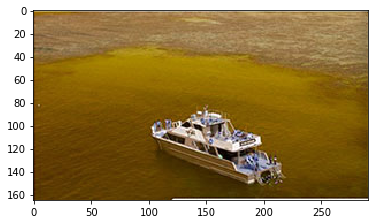

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
base_path='D:\学习笔记\ML-Tensorflow'
os.chdir(base_path)
boat=cv2.imread('boat.png')
plt.imshow(boat)

In [10]:
cv2.imshow('b',boat)
cv2.waitKey()

-1

In [19]:
sal=cv2.saliency.StaticSaliencySpectralResidual_create()
(success,salmap)=sal.computeSaliency(boat)
cv2.imshow('spe',(salmap*255).astype(np.uint8))
cv2.waitKey()

-1

In [20]:
sal=cv2.saliency.StaticSaliencyFineGrained_create()
(success,salmap)=sal.computeSaliency(boat)
threshMap = cv2.threshold(salmap.astype("uint8"), 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [21]:
cv2.imshow('thresh',threshMap)
cv2.waitKey()

-1

In [2]:
cv2.imshow('map',salmap)
cv2.waitKey()

NameError: name 'salmap' is not defined

In [1]:
import tensorflow as tf
import os
#base_dir='D:\学习笔记\ML-Tensorflow'
#os.chdir(base_dir)
model_path='D:\学习笔记\ML-Tensorflow\\frozen_model\inception\classify_image_graph_def.pb'
unfreez_tensor={'input':'DecodeJpeg/contents:0',
                            'mat_input':'ExpandDims:0',
                            'output':'pool_3:0'}
def unfreez(model_path,unfreez_tensor_dict):
    with tf.gfile.GFile(name=model_path, mode='rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        tf.import_graph_def(graph_def, name='')
        g = tf.get_default_graph()
        tensors = {t: g.get_tensor_by_name(unfreez_tensor[t]) for t in unfreez_tensor}
        return tensors
    
image_path='D:\学习笔记\ML-Tensorflow\Images\\n02085620-Chihuahua\\n02085620_199.jpg'
image_raw=open(image_path,'rb').read()

In [2]:
sess=tf.Session()
tensors=unfreez(model_path,unfreez_tensor)
out=sess.run(tensors['output'],{tensors['input']:image_raw})

In [3]:
out

array([[[[0.24889126, 0.43966088, 0.1537979 , ..., 0.09736144,
          0.11301905, 0.280192  ]]]], dtype=float32)

In [5]:
tensors

{'input': <tf.Tensor 'DecodeJpeg/contents:0' shape=() dtype=string>,
 'mat_input': <tf.Tensor 'ExpandDims:0' shape=(1, ?, ?, 3) dtype=float32>,
 'output': <tf.Tensor 'pool_3:0' shape=(1, 1, 1, 2048) dtype=float32>}

In [32]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

['DecodeJpeg/contents',
 'DecodeJpeg',
 'Cast',
 'ExpandDims/dim',
 'ExpandDims',
 'ResizeBilinear/size',
 'ResizeBilinear',
 'Sub/y',
 'Sub',
 'Mul/y',
 'Mul',
 'conv/conv2d_params',
 'conv/Conv2D',
 'conv/batchnorm/beta',
 'conv/batchnorm/gamma',
 'conv/batchnorm/moving_mean',
 'conv/batchnorm/moving_variance',
 'conv/batchnorm',
 'conv/CheckNumerics',
 'conv/control_dependency',
 'conv',
 'conv_1/conv2d_params',
 'conv_1/Conv2D',
 'conv_1/batchnorm/beta',
 'conv_1/batchnorm/gamma',
 'conv_1/batchnorm/moving_mean',
 'conv_1/batchnorm/moving_variance',
 'conv_1/batchnorm',
 'conv_1/CheckNumerics',
 'conv_1/control_dependency',
 'conv_1',
 'conv_2/conv2d_params',
 'conv_2/Conv2D',
 'conv_2/batchnorm/beta',
 'conv_2/batchnorm/gamma',
 'conv_2/batchnorm/moving_mean',
 'conv_2/batchnorm/moving_variance',
 'conv_2/batchnorm',
 'conv_2/CheckNumerics',
 'conv_2/control_dependency',
 'conv_2',
 'pool/CheckNumerics',
 'pool/control_dependency',
 'pool',
 'conv_3/conv2d_params',
 'conv_3/Conv2D

In [11]:
sess.run(tensors['input'])

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00d\x00d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x04\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\x04\x05\x07\x01\x02\x03\x08\xff\xc4\x005\x10\x00\x02\x01\x03\x02\x04\x05\x01\x06\x06\x03\x01\x00\x00\x00\x00\x01\x02\x03\x00\x04\x11\x05!\x06\x121A\x13"Qaq\x91\x072\x81\xa1\xb1\xc1\x14\x15#BR\xf0b\xd1\xe1\xf1\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x00\x01\x05\xff\xc4\x00\x1f\x11\x00\x02\x02\x03\x01\x01\x00\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03\x12!1\x13\x042Q\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11

In [12]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

model = Model(inputs=base_model.input, outputs=base_model.layers[])


ImportError: No module named 'keras.applications.resnet'

In [8]:
model = Model(inputs=base_model.input, outputs=base_model.layers[311].output)

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir("D:\\学习笔记\\ML-Tensorflow")
img=cv2.imread('Images\\n02085620-Chihuahua\\n02085620_199.jpg')
img_4d=cv2.resize(img,(224,224))[np.newaxis,:,:,:]
##model.predict(img_4d)

In [6]:
for i,layer in enumerate(base_model.layers):
    print(i,layer.name,layer.output_shape)

0 input_1 (None, 224, 224, 3)
1 conv2d_1 (None, 111, 111, 32)
2 batch_normalization_1 (None, 111, 111, 32)
3 activation_1 (None, 111, 111, 32)
4 conv2d_2 (None, 109, 109, 32)
5 batch_normalization_2 (None, 109, 109, 32)
6 activation_2 (None, 109, 109, 32)
7 conv2d_3 (None, 109, 109, 64)
8 batch_normalization_3 (None, 109, 109, 64)
9 activation_3 (None, 109, 109, 64)
10 max_pooling2d_1 (None, 54, 54, 64)
11 conv2d_4 (None, 54, 54, 80)
12 batch_normalization_4 (None, 54, 54, 80)
13 activation_4 (None, 54, 54, 80)
14 conv2d_5 (None, 52, 52, 192)
15 batch_normalization_5 (None, 52, 52, 192)
16 activation_5 (None, 52, 52, 192)
17 max_pooling2d_2 (None, 25, 25, 192)
18 conv2d_9 (None, 25, 25, 64)
19 batch_normalization_9 (None, 25, 25, 64)
20 activation_9 (None, 25, 25, 64)
21 conv2d_7 (None, 25, 25, 48)
22 conv2d_10 (None, 25, 25, 96)
23 batch_normalization_7 (None, 25, 25, 48)
24 batch_normalization_10 (None, 25, 25, 96)
25 activation_7 (None, 25, 25, 48)
26 activation_10 (None, 25, 25, 96

# Succed ！Resnet152_v1 Pre_trained Model

In [ ]:
import os
import sys
base_dir='D:\学习笔记\ML-Tensorflow\models\\research\slim'
os.chdir(base_dir)
import tensorflow as tf
import tensorflow.contrib.slim as slim 
import nets.resnet_v1 as resnet_v1
from preprocessing import vgg_preprocessing
filename = tf.placeholder(tf.string)
file_contents=tf.read_file(filename)
image=tf.image.decode_jpeg(file_contents,channels=3)
processed_image=vgg_preprocessing.preprocess_image(image,224,224,is_training=False)
processed_inputs=tf.expand_dims(processed_image,0)
is_training=tf.placeholder(tf.bool)

with slim.arg_scope(resnet_v1.resnet_arg_scope()):
    net, endpoints=resnet_v1.resnet_v1_152(processed_inputs,num_classes=None,is_training=is_training)

### 所有变量：weights、biases、moving_mean、moving_var、beta等等

In [ ]:
tf.global_variables()
#tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

### 所有tensor

In [ ]:
for n in tf.get_default_graph().as_graph_def().node:
    print(tf.get_default_graph().get_tensor_by_name(n.name+":0"))

In [3]:
import cv2
import numpy as np
os.chdir("D:\\学习笔记\\ML-Tensorflow")
f='Images\\n02085620-Chihuahua\\n02085620_199.jpg'
img_4d=cv2.resize(img,(224,224))[np.newaxis,:,:,:]

sess=tf.Session()
#所有变量初始化（这里没有local_variables，所以init_op的初始化可以不用）
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)
#预训练模型变量加载
load_v=slim.assign_from_checkpoint_fn(ignore_missing_vars=True,
                       model_path="D:\\学习笔记\ML-Tensorflow\ckpt_model\\resnet_v1_152.ckpt",var_list=tf.global_variables()
                      )
load_v(sess)
sess.run(tf.get_default_graph().get_tensor_by_name("resnet_v1_152/pool5:0"),feed_dict={filename:f,is_training:False} ).reshape(-1)

array([0.286947  , 0.31445193, 1.2546375 , ..., 0.43403283, 0.24031493,
       0.0087929 ], dtype=float32)

array([0.286947  , 0.31445193, 1.2546375 , ..., 0.43403283, 0.24031493,
       0.0087929 ], dtype=float32)

# 加载预训练权重的两种方法

In [ ]:
#第一种
#因为前面的graph和ckpt不一定配套，目前就是从本地inception代码构造的graph不是最新的（有Auxlogit层），
    #而github下载的ckpt文件是github上最新的网络代码训练的（默认没有Auxlogit层），导致graph变量再ckpt文件中找不到，报错
    #所以尝试下面的另一种方式
saver=tf.train.Saver()
saver.restore(sess,"D:\\学习笔记\ML-Tensorflow\ckpt_model\inception_v3.ckpt")

In [ ]:
#第二种
#通过ignore_missing_vars=True设置忽略缺失变量，但是出现了tensor shape对不上
    #所以最好还是用匹配的网络代码和ckpt或者冻结的pb文件
import tensorflow.contrib.slim as slim
load_v=slim.assign_from_checkpoint_fn(ignore_missing_vars=True,
                               model_path="D:\\学习笔记\ML-Tensorflow\ckpt_model\inception_v3.ckpt",var_list=tf.global_variables()
                              )

sess=tf.Session()
load_v(sess)
sess.run(tf.get_default_graph().get_tensor_by_name(
    'InceptionV3/Mixed_5d/Branch_2/Conv2d_0c_3x3/weights:0'
        ))

# 制作冻结模型的三种方法

在具体实际项目，用方式一与方式二将生成的模型利用tensorflow c++ api加载，报以上错误，采用tensorflow python加载模型报同样错：
原因是模型中用到了BatchNorm，修复方式如给出的第三种方案

In [ ]:
#第一种：freeze_graph 工具
bazel build tensorflow/python/tools:freeze_graph && bazel-bin/tensorflow/python/tools/freeze_graph 
        --input_graph=graph.pb 
        --input_checkpoint=checkpoint 
        --output_graph=./frozen_graph.pb 
        --output_node_names=output/output/scores

In [ ]:
#第二种：利用freeze_graph.py
input_graph_name = "graph.pb"
output_graph_name = "frozen_graph.pb"

input_graph_path = os.path.join(FLAGS.model_dir, input_graph_name)
input_saver_def_path = ""
input_binary = False
input_checkpoint_path = os.path.join(FLAGS.checkpoint_dir, 'saved_checkpoint') + "-0"# Note that we this normally should be only "output_node"!!!output_node_names = "output/output/scores" 
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_graph_path = os.path.join(FLAGS.model_dir, output_graph_name)
clear_devices = False

freeze_graph.freeze_graph(input_graph_path, input_saver_def_path,
                          input_binary, input_checkpoint_path,
                          output_node_names, restore_op_name,
                          filename_tensor_name, output_graph_path,
                          clear_devices)

In [ ]:
#手动合成冻结文件
import os
import sys
import tensorflow as tf
from tensorflow.python.tools import freeze_graph

"""
cd D:\学习笔记\ML-Tensorflow\models\research\slim
python export_inference_graph.py \
  --alsologtostderr \
  --model_name=inception_v3 \
  --output_file=/tmp/inception_v3_inf_graph.pb
  """
os.chdir("D:\学习笔记\ML-Tensorflow")
input_graph="frozen_model\\resnet_v1_inf_graph.pb"
input_checkpoint="ckpt_model\\resnet_v1_152.ckpt"
output_node_names="resnet_v1_152/pool5"
output_graph="frozen_model\\resnet_frozen_v1_inf_graph.pb"

restore_op_name = 'save/restore_all'
filename_tensor_name = 'save/Const:0'

saved_path = freeze_graph.freeze_graph(
    input_graph, '', True, input_checkpoint,
    output_node_names, restore_op_name, filename_tensor_name,
    output_graph, False, '', '')

print('Frozen model saved to ' + output_graph)

#这种方式对于VGG和Resnet会报ckpt有1001而目前的网络是1000，用bazel-bin/***可以通过加--label_offset=1解决。

In [10]:
import os
import sys
import tensorflow as tf
base_dir='D:\学习笔记\ML-Tensorflow'
os.chdir(base_dir)
model_path="frozen_model\inception_frozen_v3_inf_graph.pb"
unfreez_tensor={'input':'input:0',
                            'output':'InceptionV3/Predictions/Softmax:0'}
with tf.gfile.GFile(name=model_path, mode='rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        tf.import_graph_def(graph_def, name='')
        g = tf.get_default_graph()
        tensors = {t: g.get_tensor_by_name(unfreez_tensor[t]) for t in unfreez_tensor}

In [13]:
sess=tf.Session()
sess.run(tensors['output'])
'''
通过手动合成的冻结文件，并不能直接获取当前的tensor,可能是
1.前面的冻结代码只把trainable variale冻结，tensor并没有冻结
2.也有可能是哪里出了问题导致
'''

InvalidArgumentError: You must feed a value for placeholder tensor 'input' with dtype float and shape [?,299,299,3]
	 [[node input (defined at <ipython-input-1-bdb460000d12>:10) ]]

Original stack trace for 'input':
  File "d:\sssssssssssssssssssss\python\python35\lib\runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "d:\sssssssssssssssssssss\python\python35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "d:\sssssssssssssssssssss\python\python35\lib\asyncio\base_events.py", line 295, in run_forever
    self._run_once()
  File "d:\sssssssssssssssssssss\python\python35\lib\asyncio\base_events.py", line 1254, in _run_once
    handle._run()
  File "d:\sssssssssssssssssssss\python\python35\lib\asyncio\events.py", line 125, in _run
    self._callback(*self._args)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-bdb460000d12>", line 10, in <module>
    tf.import_graph_def(graph_def, name='')
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tensorflow\python\framework\importer.py", line 443, in import_graph_def
    _ProcessNewOps(graph)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tensorflow\python\framework\importer.py", line 236, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 3751, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 3751, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 3641, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "d:\sssssssssssssssssssss\python\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
#第三种graph_util.convert_variables_to_constants
import os, argparse
import tensorflow as tf
from tensorflow.python.framework import graph_util
os.chdir('D:\学习笔记\ML-Tensorflow')
def freeze_graph(model_folder):
    # We retrieve our checkpoint fullpath
    checkpoint = tf.train.get_checkpoint_state(model_folder)
    input_checkpoint = checkpoint.model_checkpoint_path    # We precise the file fullname of our freezed graph
    absolute_model_folder = "/".join(input_checkpoint.split('/')[:-1])
    output_graph = absolute_model_folder + "/frozen_model.pb"
    print output_graph    # Before exporting our graph, we need to precise what is our output node
    # This is how TF decides what part of the Graph he has to keep and what part it can dump
    # NOTE: this variable is plural, because you can have multiple output nodes
    output_node_names = "output/output/scores"

    # We clear devices to allow TensorFlow to control on which device it will load operations
    clear_devices = True

    # We import the meta graph and retrieve a Saver
    saver = tf.train.import_meta_graph(input_checkpoint + '.meta', clear_devices=clear_devices)    # We retrieve the protobuf graph definition
    graph = tf.get_default_graph()
    input_graph_def = graph.as_graph_def()    
    # fix batch norm nodes
    for node in input_graph_def.node:        
        if node.op == 'RefSwitch':
            node.op = 'Switch'
            for index in range(len(node.input)):                
                if 'moving_' in node.input[index]:
                    node.input[index] = node.input[index] + '/read'
        elif node.op == 'AssignSub':
            node.op = 'Sub'
            if 'use_locking' in node.attr: 
                del node.attr['use_locking']    
    # We start a session and restore the graph weights
    with tf.Session() as sess:
        saver.restore(sess, input_checkpoint)        # We use a built-in TF helper to export variables to constants
        output_graph_def = graph_util.convert_variables_to_constants(
            sess, # The session is used to retrieve the weights
            input_graph_def, # The graph_def is used to retrieve the nodes 
            output_node_names.split(",") # The output node names are used to select the usefull nodes
        ) 

        # Finally we serialize and dump the output graph to the filesystem
        with tf.gfile.GFile(output_graph, "wb") as f:
            f.write(output_graph_def.SerializeToString())
        print("%d ops in the final graph." % len(output_graph_def.node))
        if __name__ == '__main__':
            parser = argparse.ArgumentParser()
            parser.add_argument("--model_folder", type=str, help="Model folder to export")
            args = parser.parse_args()

    freeze_graph(args.model_folder)

# 将inception和resnet特征融合训练的整个模型导出成一个pb

In [2]:
with tf.Graph().as_default(),tf.Session() as sess0:
    os.chdir('D:\学习笔记\ML-Tensorflow')
    filename = tf.placeholder(tf.string)
    file_contents=tf.read_file(filename)
    image=tf.image.decode_jpeg(file_contents,channels=3)    
    image=tf.cast(image,tf.float32)
    f='Images\\n02085620-Chihuahua\\n02085620_199.jpg'
    img=sess0.run(image,{filename:f})

In [7]:
comb_featrue=sess.run(comb_tensor,{incept_tensors['input']:img,is_training:False})

In [6]:
sess.run(incept_out_tensor,{incept_tensors['input']:img})

array([0.24889126, 0.43966088, 0.1537979 , ..., 0.09736144, 0.11301905,
       0.280192  ], dtype=float32)

In [7]:
sess.run(resnet_out_tensor,{incept_tensors['input']:img,is_training:False})

array([0.286947  , 0.31445193, 1.2546375 , ..., 0.43403283, 0.24031493,
       0.0087929 ], dtype=float32)

In [ ]:
import os
import sys
base_dir='D:\学习笔记\ML-Tensorflow\models\\research\slim'
os.chdir(base_dir)
import tensorflow as tf
import tensorflow.contrib.slim as slim 
import nets.resnet_v1 as resnet_v1
from preprocessing import vgg_preprocessing
from tensorflow.python.framework import graph_util
os.chdir('D:\学习笔记\ML-Tensorflow')
##构建inception网络和权重初始化
sess=tf.Session()

model_path='frozen_model\inception\classify_image_graph_def.pb'
unfreez_tensor={'input':'Cast:0',
                            'output':'pool_3:0'}
def unfreez(model_path,unfreez_tensor_dict):
    with tf.gfile.GFile(name=model_path, mode='rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        tf.import_graph_def(graph_def, name='')
        g = tf.get_default_graph()
        tensors = {t: g.get_tensor_by_name(unfreez_tensor[t]) for t in unfreez_tensor}
        return tensors    
incept_tensors=unfreez(model_path,unfreez_tensor)
incept_out_tensor=tf.squeeze(incept_tensors['output'])

##构建resnet网络和权重初始化
processed_image=vgg_preprocessing.preprocess_image(incept_tensors['input'],224,224,is_training=False)
processed_inputs=tf.expand_dims(processed_image,0)

In [1]:
is_training=tf.placeholder(tf.bool)
with slim.arg_scope(resnet_v1.resnet_arg_scope()):
    net, endpoints=resnet_v1.resnet_v1_152(processed_inputs,num_classes=None,is_training=is_training)
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)
#预训练模型变量加载
load_v=slim.assign_from_checkpoint_fn(ignore_missing_vars=True,
                       model_path="ckpt_model\\resnet_v1_152.ckpt",var_list=tf.global_variables()
                      )
load_v(sess)
resnet_out_tensor=tf.squeeze(tf.get_default_graph().get_tensor_by_name("resnet_v1_152/pool5:0"))
comb_tensor=tf.concat([incept_out_tensor,resnet_out_tensor],0)
comb_tensor=tf.reshape(comb_tensor,(-1,comb_tensor.get_shape()[0]),name='combine_feature')

def comb_net(image_batch):
    iteration=10
    label_batch = tf.placeholder(tf.int64,[None])
    is_training=tf.placeholder(tf.bool)
    keep_prob_incp=tf.placeholder(tf.float32)
    keep_prob=tf.placeholder(tf.float32)
    reg=1e-4

    fc0=tf.layers.dropout(image_batch,keep_prob_incp,training=is_training)
    fc1= tf.contrib.layers.fully_connected(
                                    fc0,
                                    1024,
                                    weights_initializer=tf.random_normal_initializer(stddev=tf.sqrt(1/2048)),
                                    #weights_initializer=tf.contrib.layers.xavier_initializer(),
                                    normalizer_fn=tf.layers.batch_normalization,#正则化项就相当于对数据集进行了尺度变换和位置变换,也就不需要下面的bias了
                                    normalizer_params={'training':is_training},
                                    weights_regularizer=tf.contrib.layers.l2_regularizer(scale=reg),
                                    activation_fn=tf.nn.relu,
                                    scope="fc_lay1"
                                    )
    fc1=tf.layers.dropout(fc1,keep_prob,training=is_training)


    final_fully_connected = tf.contrib.layers.fully_connected(
                                    fc1,
                                    120,  # 120，Number of dog breeds in the ImageNet Dogs dataset
                                    weights_initializer=tf.random_normal_initializer(stddev=tf.sqrt(1/1024)),
                                    #weights_initializer=tf.contrib.layers.xavier_initializer(),
                                    normalizer_fn=tf.layers.batch_normalization,
                                    normalizer_params={'training':is_training}, 
                                    weights_regularizer=tf.contrib.layers.l2_regularizer(scale=reg),
                                    activation_fn=tf.nn.relu,
                                    scope="final_fully_connected"
                                    )

    #设置损失函数
    loss = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=final_fully_connected, labels=label_batch))
    regularzation_loss=tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss=tf.add_n([loss]+regularzation_loss)

    global_step = tf.Variable(0)

    learning_rate = tf.train.exponential_decay(
        0.0001,
        global_step,
        iteration,
        0.95,
        staircase=True)

    learning_rate=0.0001
    trainer = tf.train.AdamOptimizer(
        learning_rate, 0.9).minimize(
        loss, global_step=global_step)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    trainer = tf.group([update_ops,trainer])

    prediction = tf.nn.softmax(final_fully_connected)
    label_prediction=tf.argmax(prediction,axis=1)
    corr_prediction=tf.equal(label_prediction,label_batch)
    right_count = tf.reduce_sum(tf.cast(corr_prediction,tf.float32))
    size=tf.size(label_prediction)
    return prediction

prediction=comb_net(comb_tensor)  
load_v=slim.assign_from_checkpoint_fn(ignore_missing_vars=True,
                       model_path="model_save\Dog-Reco-6784",var_list=tf.global_variables()
                      )
load_v(sess)

W0711 19:18:53.450090  4980 deprecation_wrapper.py:119] From D:\学习笔记\ML-Tensorflow\models\research\slim\nets\resnet_utils.py:228: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0711 19:18:55.406368  4980 deprecation.py:323] From D:\学习笔记\ML-Tensorflow\models\research\slim\preprocessing\vgg_preprocessing.py:249: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0711 19:18:55.474737  4980 deprecation_wrapper.py:119] From D:\学习笔记\ML-Tensorflow\models\research\slim\preprocessing\vgg_preprocessing.py:256: The name tf.rint is deprecated. Please use tf.math.rint instead.

W0711 19:18:55.482222  4980 deprecation.py:323] From D:\学习笔记\ML-Tensorflow\models\research\slim\preprocessing\vgg_preprocessing.py:256: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W07

In [4]:
output_graph_def = graph_util.convert_variables_to_constants(
            sess, # The session is used to retrieve the weights
            tf.get_default_graph().as_graph_def() , # The graph_def is used to retrieve the nodes 
            ['Softmax_1'] # The output node names are used to select the usefull nodes
        ) 

# Finally we serialize and dump the output graph to the filesystem
with tf.gfile.GFile("frozen_model\\incp_resnet_featrue_comb.pb", "wb") as f:
    f.write(output_graph_def.SerializeToString())

W0711 19:21:35.076559  4980 deprecation.py:323] From <ipython-input-4-4008c17e1ee0>:4: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0711 19:21:35.082547  4980 deprecation.py:323] From d:\sssssssssssssssssssss\python\python35\lib\site-packages\tensorflow\python\framework\graph_util_impl.py:270: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


In [15]:
sess.run(tf.get_default_graph().get_tensor_by_name('top3:0'),{incept_tensors['input']:img,is_training:False,
                                                                        tf.get_default_graph().get_tensor_by_name('Placeholder_2:0'):False,
                                                                        tf.get_default_graph().get_tensor_by_name('Placeholder_3:0'):1,
                                                                        tf.get_default_graph().get_tensor_by_name('Placeholder_4:0'):1,
                                                       })

array([[0.59548706, 0.24307597, 0.01726865]], dtype=float32)

In [3]:
sess.run(tf.get_default_graph().get_tensor_by_name('Softmax_1:0'),{incept_tensors['input']:img,is_training:False,
                                                                        tf.get_default_graph().get_tensor_by_name('Placeholder_2:0'):False,
                                                                        tf.get_default_graph().get_tensor_by_name('Placeholder_3:0'):1,
                                                                        tf.get_default_graph().get_tensor_by_name('Placeholder_4:0'):1,
                                                       })

array([[0.59548706, 0.0009854 , 0.0009854 , 0.0009854 , 0.0009854 ,
        0.0009854 , 0.01726865, 0.00559397, 0.0009854 , 0.00116201,
        0.0009854 , 0.0009854 , 0.00132617, 0.0009854 , 0.0009854 ,
        0.0009854 , 0.00123364, 0.0009854 , 0.0009854 , 0.00124937,
        0.0009854 , 0.0009854 , 0.00103862, 0.0009854 , 0.0009854 ,
        0.0009854 , 0.00115441, 0.0011395 , 0.0009854 , 0.0009854 ,
        0.00124357, 0.00140422, 0.0011047 , 0.0009854 , 0.0009854 ,
        0.00213761, 0.0009854 , 0.0009854 , 0.00099042, 0.00126336,
        0.0009854 , 0.00187849, 0.00123833, 0.00127862, 0.0009854 ,
        0.0009854 , 0.0011321 , 0.0009854 , 0.0009854 , 0.0009854 ,
        0.00195767, 0.0009854 , 0.0009854 , 0.00238984, 0.0009854 ,
        0.00154064, 0.00194399, 0.0009854 , 0.0009854 , 0.00130159,
        0.0009854 , 0.0009854 , 0.0009854 , 0.00110569, 0.0009854 ,
        0.0009854 , 0.0009854 , 0.0009854 , 0.00183964, 0.00124665,
        0.0009854 , 0.00109905, 0.00232858, 0.00

In [41]:
sess_top.run(graph_top.get_tensor_by_name('Softmax:0'),{graph_top.get_tensor_by_name('Placeholder:0'):comb_featrue,
                                                                        graph_top.get_tensor_by_name('Placeholder_2:0'):False,
                                                                        graph_top.get_tensor_by_name('Placeholder_3:0'):1,
                                                                        graph_top.get_tensor_by_name('Placeholder_4:0'):1,
                                                       })

array([[0.59548706, 0.0009854 , 0.0009854 , 0.0009854 , 0.0009854 ,
        0.0009854 , 0.01726865, 0.00559397, 0.0009854 , 0.00116201,
        0.0009854 , 0.0009854 , 0.00132617, 0.0009854 , 0.0009854 ,
        0.0009854 , 0.00123364, 0.0009854 , 0.0009854 , 0.00124937,
        0.0009854 , 0.0009854 , 0.00103862, 0.0009854 , 0.0009854 ,
        0.0009854 , 0.00115441, 0.0011395 , 0.0009854 , 0.0009854 ,
        0.00124357, 0.00140422, 0.0011047 , 0.0009854 , 0.0009854 ,
        0.00213761, 0.0009854 , 0.0009854 , 0.00099042, 0.00126336,
        0.0009854 , 0.00187849, 0.00123833, 0.00127862, 0.0009854 ,
        0.0009854 , 0.0011321 , 0.0009854 , 0.0009854 , 0.0009854 ,
        0.00195767, 0.0009854 , 0.0009854 , 0.00238984, 0.0009854 ,
        0.00154064, 0.00194399, 0.0009854 , 0.0009854 , 0.00130159,
        0.0009854 , 0.0009854 , 0.0009854 , 0.00110569, 0.0009854 ,
        0.0009854 , 0.0009854 , 0.0009854 , 0.00183964, 0.00124665,
        0.0009854 , 0.00109905, 0.00232858, 0.00

In [16]:
for n in tf.get_default_graph().as_graph_def().node:
    try:
        print(tf.get_default_graph().get_tensor_by_name(n.name+':0'))
    except:
        print(n.name, "has 0 outputs")
        continue

Tensor("DecodeJpeg/contents:0", shape=(), dtype=string)
Tensor("DecodeJpeg:0", shape=(?, ?, 3), dtype=uint8)
Tensor("Cast:0", shape=(?, ?, 3), dtype=float32)
Tensor("ExpandDims/dim:0", shape=(1,), dtype=int32)
Tensor("ExpandDims:0", shape=(1, ?, ?, 3), dtype=float32)
Tensor("ResizeBilinear/size:0", shape=(2,), dtype=int32)
Tensor("ResizeBilinear:0", shape=(1, 299, 299, 3), dtype=float32)
Tensor("Sub/y:0", shape=(), dtype=float32)
Tensor("Sub:0", shape=(1, 299, 299, 3), dtype=float32)
Tensor("Mul/y:0", shape=(), dtype=float32)
Tensor("Mul:0", shape=(1, 299, 299, 3), dtype=float32)
Tensor("conv/conv2d_params:0", shape=(3, 3, 3, 32), dtype=float32)
Tensor("conv/Conv2D:0", shape=(1, 149, 149, 32), dtype=float32)
Tensor("conv/batchnorm/beta:0", shape=(32,), dtype=float32)
Tensor("conv/batchnorm/gamma:0", shape=(32,), dtype=float32)
Tensor("conv/batchnorm/moving_mean:0", shape=(32,), dtype=float32)
Tensor("conv/batchnorm/moving_variance:0", shape=(32,), dtype=float32)
Tensor("conv/batchnorm:

# 学习率测试

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.1  # 初始学习速率时0.1
decay_rate = 0.96  # 衰减率
global_steps = 1000  # 总的迭代次数
decay_steps = 100  # 衰减次数

global_ = tf.Variable(tf.constant(0))
c = tf.train.exponential_decay(learning_rate, global_, decay_steps, decay_rate, staircase=True)
d = tf.train.exponential_decay(learning_rate, global_, decay_steps, decay_rate, staircase=False)

T_C = []
F_D = []

with tf.Session() as sess:
    for i in range(global_steps):
        T_c = sess.run(c, feed_dict={global_: i})
        T_C.append(T_c)
        F_d = sess.run(d, feed_dict={global_: i})
        F_D.append(F_d)

plt.figure(1)
plt.plot(range(global_steps), F_D, 'r-')# "-"表示折线图,r表示红色,b表示蓝色
plt.plot(range(global_steps), T_C, 'b-')


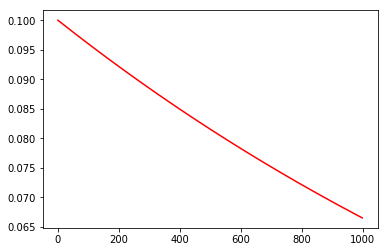

In [5]:
plt.plot(range(global_steps), F_D, 'r-')

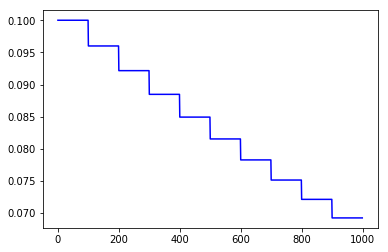

In [4]:
plt.plot(range(global_steps), T_C, 'b-')